# Import

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# Run

In [240]:
result = !python main.py @config/defaults.txt

# Parse output

In [241]:
result = result[1:]

iter_result = result[:-1]
final_result = result[-1]

N = int(final_result.split(',')[17])

iter_result = [l.split('   ') for l in iter_result]

neighbor_fitness = np.array([float(l[3]) for l in iter_result])
current_fitness = np.array([float(l[4]) for l in iter_result])
best_fitness = np.array([float(l[5]) for l in iter_result])
temp = np.array([float(l[6]) for l in iter_result])

# Compute probability over time

In [242]:
prob = np.exp((neighbor_fitness - current_fitness) / temp)
prob = np.where(prob >= 1, 0, prob)

# Plot

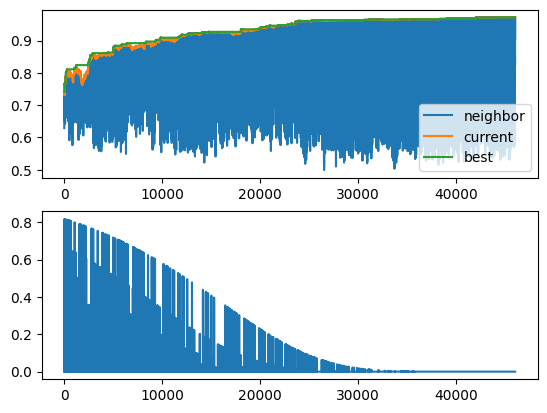

In [243]:
window = range(0,len(neighbor_fitness))
# window = range(40000,len(neighbor_fitness))
# window = range(28600,28700)

ax1 = plt.subplot(211)
ax1.plot(neighbor_fitness[window], label="neighbor")
ax1.plot(current_fitness[window], label="current")
ax1.plot(best_fitness[window], label="best")
ax1.legend()

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(prob[window])

# ax2 = plt.subplot(313, sharex=ax1)
# ax2.plot((neighbor_fitness - current_fitness)[window])

In [244]:
result[-1]

'779.8563184738159,0.9715,0.94668,0.8931462925851702,1,1835504127,1731038949,1320224556,2330041505,321059914,3497704732,1346483305,500,500,15,4,4,2000,SA,SRMP,None,None,None,None,None,0.005,0.9999,1,5e-05,None,None,None,1,None,None,None,None,None'